This notebook contains all essentails statistic topics discussed on our Intro to Data Science Course. Note that many of these concepts are extensive, so to fully understand them you need to spend time on them yourself.

## Quick introduction

Statistics is the disciplin that concerns the collection, organization, analysis, interpretation, and presentation of data.

On previous lessons, we talked about organization and presentation of data. Now, it is time to discuss interpretation and analysis in slightly more technical way.

##### Random Variable

A **random variable** is a numerical outcome that results from a random phenomenon. Formally, a random variable $ X $ is a measurable function $X: \Omega \rightarrow \mathbb{R}$, where $ \Omega $ represents the sample space, and $ \mathbb{R} $ represents the real numbers. However, practically, it's a variable that can take on different values, each with an associated probability.

Random variables are typically denoted by capital letters such as $X$, $Y$, or $Z$. The specific values a random variable can take are represented by lowercase letters like $x$, $y$, or $z$.

There are two main types of random variables:
- **Discrete random variable**: Can only take distinct, separate values (e.g., points on a number line).
- **Continuous random variable**: Can take any value within a given range or interval, covering real numbers (e.g., a segment on the real line).

##### Probability Distribution

The **distribution** of a random variable describes how its possible values are distributed, or how likely each value is to occur.

For a **discrete random variable**, the probability distribution consists of a set of pairs $(x_i, p_i)$, where:
- $x_i$ represents a specific value the random variable $X$ can take.
- $p_i$ is the probability that $X = x_i$, i.e., the likelihood that the random variable takes the value $x_i$.

In other words, the probability distribution provides a complete description of the random variable's behavior.

##### Cumulative Distribution Function (CDF)

The **cumulative distribution function (CDF)**, denoted by $F(x)$, is the probability that the random variable $X$ takes a value less than or equal to $x$. Mathematically, it is defined as:

$$
F(x) = P(X \leq x)
$$

For discrete variables, the CDF is a step function, while for continuous variables, it is a smooth, continuous function. The CDF has values between 0 and 1.
$$F(-\infty)=0$$
$$F(\infty)=1$$

This function provides a cumulative measure of probabilities up to a given value of $x$, allowing us to understand the likelihood that the random variable falls within a certain range.

##### Is it really important?

Random variables and their associated concepts, like probability distributions, the cumulative distribution function (CDF), and expectation, are fundamental to statistics because they allow us to model and analyze uncertainty in real-world phenomena.

1. **Modeling Uncertainty**
Many phenomena in the real world are inherently unpredictable. Random variables enable us to quantify uncertainty by associating probabilities with different outcomes.

2. **Describing Distributions of Data**
Random variables help describe how data is distributed. By understanding the probability distribution, statisticians can make inferences about the behavior of a population.

3. **Forming the Basis of Statistical Inference**
Most statistical tests and models, such as the t-test, ANOVA, or regression analysis, rely on random variables and their distributions to draw conclusions from data. Understanding how a random variable behaves under the null hypothesis, for example, lets us calculate p-values and make decisions about whether to reject the null hypothesis.

4. **Making Predictions**
In predictive modeling, random variables help in constructing models that estimate future outcomes based on past data. For example, in regression analysis, the random variable represents the outcome we're trying to predict, and we use statistical methods to estimate how the independent variables (predictors) influence this outcome.

5. **Risk Assessment and Decision Making**
In fields such as finance, medicine, and engineering, decisions often need to be made under uncertainty. Random variables and their distributions allow us to assess risks by estimating the probability of various outcomes. 

6. **Enabling Hypothesis Testing**
Many statistical tests rely on the sampling distribution of a statistic, which itself is a random variable. Understanding the distribution of the sample mean, for example, helps statisticians decide whether a sample provides strong evidence against a null hypothesis. The concepts of random variables and their distributions thus form the foundation of hypothesis testing, one of the core tools in statistics.

## Examples of Distributions

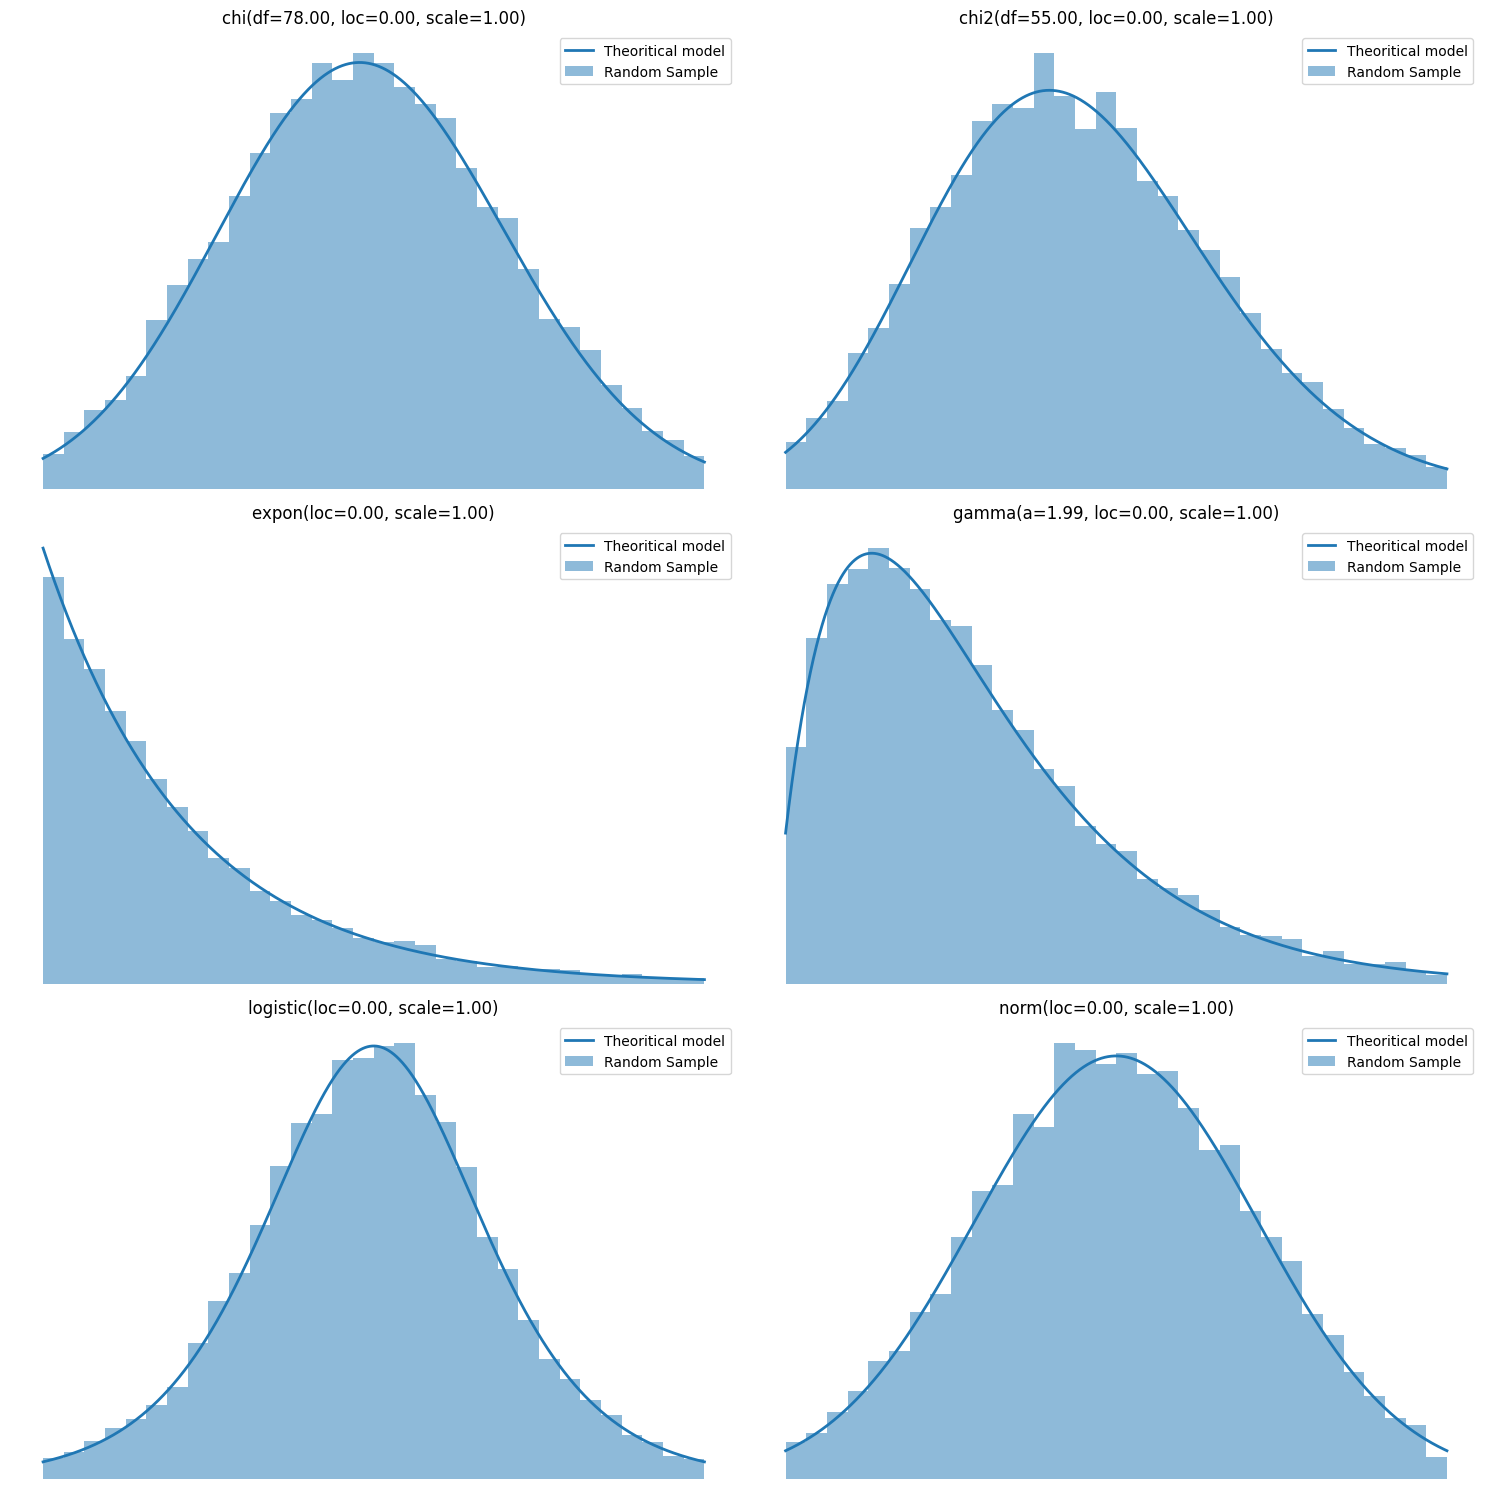

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

DISTRIBUTIONS = [
    stats.chi(df=78, loc=0.0, scale=1.0),
    stats.chi2(df=55, loc=0.0, scale=1.0),
    stats.expon(loc=0.0, scale=1.0),
    stats.gamma(a=1.99, loc=0.0, scale=1.0),
    stats.logistic(loc=0.0, scale=1.0),
    stats.norm(loc=0.0, scale=1.0),
]

bins = 32
size = 16384
plotData = []

for distribution in DISTRIBUTIONS:
    try:
        rv = pd.Series(distribution.rvs(size=size))
        start = distribution.ppf(0.01)
        end = distribution.ppf(0.99)

        x = np.linspace(start, end, size)
        y = distribution.pdf(x)
        pdf = pd.Series(y, x)

        b = np.linspace(start, end, bins+1)
        y, x = np.histogram(rv, bins=b, density=True) 
        x = [(a+x[i+1])/2.0 for i, a in enumerate(x[0:-1])]
        hist = pd.Series(y, x)

        title = '{}({})'.format(distribution.dist.name, ', '.join(
            ['{}={:0.2f}'.format(k, v) for k, v in distribution.kwds.items()]))

        plotData.append({
            'pdf': pdf,
            'hist': hist,
            'title': title
        })

    except Exception as e:
        print(f'could not create data for {distribution.dist.name}: {e}')

n_plots = len(plotData)
n_cols = 2
n_rows = (n_plots + 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

for i, data in enumerate(plotData):
    ax = axes[i // n_cols, i % n_cols]
    w = abs(abs(data['hist'].index[0]) - abs(data['hist'].index[1]))

    data['pdf'].plot(kind='line', label='Theoritical model', legend=True, lw=2, ax=ax)
    ax.bar(data['hist'].index, data['hist'].values,
           label='Random Sample', width=w, align='center', alpha=0.5)
    ax.set_title(data['title'])
    ax.legend()
    ax.axis('off')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])


plt.tight_layout()
plt.show()

## Simple Metrics

### Mean

Mean is the most common measure of central tendency, used to summarize a set of data by finding the central or average value.

$$Mean=\frac{\Sigma X_i}{n} $$

In [24]:
values = [4,5,6,7,8]
mean = np.mean(values)

print(f"Calculated mean: {mean}")

Calculated mean: 6.0


There is more types of means:
- Geometric mean
- Harmonic mean
- Weighted mean

It may not always reflect the distribution of the data accurately, especially if the data is highly skewed. The mean is sensitive to extreme values (outliers). A single very large or very small number can skew the mean significantly.

### Median

The median is the middle value in a dataset when the values are arranged in ascending or descending order.

In [25]:
median = np.median(values)

print(f"Calculated median: {median}")

Calculated median: 6.0


The median is not sensitive to outliers. Unlike the mean, which can be heavily skewed by extreme values, the median provides a more accurate reflection of the central tendency when the dataset contains outliers.

It is not Useful for Small Datasets: In very small datasets, especially with fewer than five data points, the median may not give a meaningful measure of central tendency.

### Expected value
Symbolized as E(X), is often referred to as the long-term average. This means that over the long term of doing an experiment over and over, you would expect this average.
$$E(X)=\sum xP(X)$$

Knowing values and it's probabilities, we can calculate expected value

In [26]:
probs = [.1, .2, .3, .4, .5]

def expectedValue(values: list[int], weights: list[float]) -> float:
    values = np.asarray(values)
    weights = np.asarray(weights)
    return np.sum(values * weights)

print(f"Expected value for this data is: {expectedValue(values, probs)}")

Expected value for this data is: 10.0


### Standard Deviation

**Standard deviation** is a measure that quantifies the amount of variation or dispersion in a set of data values. It indicates how much the individual data points deviate from the mean (average) value of the dataset.

- **Low standard deviation**: The data points are clustered closely around the mean, showing little variability.
- **High standard deviation**: The data points are spread out over a wider range, indicating greater variability.

In essence, standard deviation helps you understand how consistent or dispersed the data is relative to the average value.


For discrete values:
$$\sigma ={\sqrt {{\frac {1}{N}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}}},{\text{ where }}\mu ={\frac {1}{N}}\sum _{i=1}^{N}x_{i}$$

For continous values:
$$\sigma ={\sqrt {\int _{\mathbf {X} }(x-\mu )^{2}\,p(x)\,\mathrm {d} x}},{\text{ where }}\mu =\int _{\mathbf {X} }x\,p(x)\,\mathrm {d} x$$

But in Python, we can do this easily with NumPy:

In [29]:
standardDeviation = np.std(values)

print(f"Calculated standard deviation: {standardDeviation}")

Calculated standard deviation: 1.4142135623730951


### Covariance

**Covariance** is a measure of the relationship between two random variables. It indicates the direction of the linear relationship between these variables, showing whether they tend to increase or decrease together.

- If both variables tend to increase or decrease together, the **covariance is positive**, indicating a direct relationship.
- If one variable tends to increase when the other decreases (and vice versa), the **covariance is negative**, indicating an inverse relationship.

In simpler terms, covariance helps us understand how changes in one variable are associated with changes in another.

Interpretation:
- **Positive covariance**: Both variables move in the same direction (when one increases, the other tends to increase as well).
- **Negative covariance**: The variables move in opposite directions (when one increases, the other tends to decrease).
- **Zero covariance**: There is no consistent relationship between the variables.

Example:
Consider two random variables: stock prices and company revenue. If the stock price increases when the company's revenue increases, the covariance between the two would be positive, indicating a direct relationship. Conversely, if stock prices fall when revenue rises, the covariance would be negative.


$$\displaystyle \operatorname {cov} (X,Y)=\operatorname {E} {{\big [}(X-\operatorname {E} [X])(Y-\operatorname {E} [Y]){\big ]}}$$

$$\displaystyle \operatorname {cov} (X,Y)=\operatorname {E} [XY] - \operatorname {E} [X] \operatorname {E} [Y]$$

Again, we can use simple Python code:

In [4]:
x = np.random.normal(size=(1,10))
y = np.random.normal(size=(1,10))

cov = np.cov(x,y)
# returns covariance matrix
cov

array([[0.60890221, 0.29058609],
       [0.29058609, 1.60923759]])

### Correlation and how to interpret it

**Correlation** is relationship between data. In this study case, we will look up Pearson's and Spearman's correlation coefficents.

**Pearson** correlation coefficent measures linear correlation between two sets of data. In other words, how closely the data falls in a straight line. In this method, distribution of data should be normal.

$${\displaystyle Corr_{X,Y}={\frac {{cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$$

Usage:
Pearson correlation is used when the relationship between variables is linear and the data is continuous and meets the assumption of normality. Typical applications include the analysis of economic, financial and medical variables, where the relationships are often close to linear.

In [5]:
x = [1,2,3,4]
z = [4,3,2,1]

corr1 = stats.pearsonr(x,x)
# correlation = 1
print(f"Correlation for same data, according to theory above, is equal {corr1[0]:.2f}")
corr2 = stats.pearsonr(x,z)
# correlation = -1
print(f"Correlation for exactly oposit data, according to theory above, is equal {corr2[0]:.2f}")

Correlation for same data, according to theory above, is equal 1.00
Correlation for exactly oposit data, according to theory above, is equal -1.00


**Spearman's** correlation coefficent measures the monotonic relationship between two variables. Monotonicity means that if one variable increases, the other always increases (or always decreases), but it does not have to be a linear relationship. Spearman's coefficient is based on the ranks of the variables, not on their actual values. Distribution of data doesn't need to be normal.
$${\displaystyle} Corr_{X,Y}={\frac {cov(R(X),(R(Y))}{\sigma_{R_X} \sigma_{R_Y}}}$$

Usage:
Spearman correlation is used when the relationship between variables is not linear or when the data does not meet the assumption of normality. It is ideal when we have ordinal data, rankings, or we suspect that variables are monotonically correlated.

In [6]:
x = [1,4,6,7,12,444]
z = [2,5,3,6,8,500]

corr1 = stats.spearmanr(x,z)
print(f"Spearmans correlation coefficent: {corr1[0]:.2f}")

Spearmans correlation coefficent: 0.94


The correlation coefficient ranges from −1 to 1. An absolute value of exactly 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line. The correlation sign is determined by the regression slope: a value of +1 implies that all data points lie on a line for which Y increases as X increases, whereas a value of -1 implies a line where Y increases while X decreases. A value of 0 implies that there is no linear dependency between the variables.

Real life examples:

A positive correlation example is the relationship between the speed of a wind turbine and the amount of energy it produces. As the turbine speed increases, electricity production also increases.

A negative correlation example is the relationship between outdoor temperature and heating costs. As the temperature increases, heating costs decrease.

## Sampling

The population is the set of all observations (individuals, objects, events, or procedures) and is usually very large and diverse, whereas a sample is a subset of observations from the population that ideally is a true representation of the population.

Operating on whole population can be very resource exstensive and expensive, thus several approachs are used to extract samples.

Our goal is to make unbiased sample which represents whole population well.

Below, there are some approaches that can be used to make samples from population. But first, let's create population with normal distribution.

In [7]:
sizeOfPopulation = 10000
avg = 10
std = 2

population = np.random.normal(avg, std, sizeOfPopulation)

### How to calculate sample size?

To meet our desired statistical constraints, we need to have given number of samples.

In practice, we can use online calculators:
https://www.calculator.net/sample-size-calculator.html

We need to consider **confidence level, error margin, size of population.** 

**The confidence level** represents the degree of certainty that a sample accurately reflects the population being studied, within a specified confidence interval. It indicates how likely it is that the true population parameter falls within the interval calculated from the sample. The most common confidence levels used are 90%, 95%, and 99%. For example, a 95% confidence level means we can be 95% certain that the true population parameter lies within the range specified by the confidence interval.

**The confidence interval** is the estimated range of values within which the true population parameter is expected to fall. It is often expressed as a range around a sample statistic, such as 40 ± 2% or 40 ± 5%. In this case, the confidence interval suggests that the true population value is likely between 38% and 42% (for 40 ± 2%) or between 35% and 45% (for 40 ± 5%).​

Equation for sample size:
$$n = \frac{Z^2*p*(1-p)}{e^2}$$	

where:
- Z - ZScore (measure that describes how many standard deviations a data point is from the mean of the data set. Each confidence level has its own Z-score is based on the properties of the normal distribution)
- p - proportion (part or fraction of a whole population that has a particular characteristic or attribute)
- e - error margin

We can calculate this in Python.

In [8]:
def calculateSampleSize(zScore: float, proportion: float, error: float) -> int:
    return int(np.ceil((zScore**2 * proportion * (1 - proportion)) / (error**2)))

Z = 1.96 # for confidence level 95%
p = 0.5 # proportion 50%
e = 0.05 #error margin 5%

sampleSize = calculateSampleSize(Z,p,e)
print(f"Calculated size of sample: {sampleSize}")


Calculated size of sample: 385


### Random sampling

The simplest data sampling technique that creates a random sample from the original population. Every sampled observation has the same probability of getting selected during the sample generation process. Random Sampling is usually used when we don’t have any kind of prior information about the target population.

In [9]:
def randomSampling(population: list[float], n: int) -> list[float]:
    randomSample = np.random.choice(population, replace=False, size=n)
    return randomSample


randomSample = randomSampling(population, 5)
print(f"Random sampled array of data: {randomSample}")

Random sampled array of data: [ 7.42134247  6.23488934 11.33438867  8.8454099   9.27783685]


### Systematic sampling

Elements from a target population are selected from a random starting point and after a fixed sampling interval. We calculate the sampling interval by dividing the entire population size by the desired sample size.

In [10]:
def systematicSampling(population: list[float], step: int) -> list[float]:
    # Create array of indexes
    ids = pd.Series(np.arange(1, len(population)+1, 1))
    population  = pd.Series(population)
    # Create dataframe with data and index
    populationWithIndexes = pd.concat([ids-1, population], axis=1)
    populationWithIndexes.columns = ["id", "data"]
    populationWithIndexes["id"].astype('int')
    # Select indexes
    selectedIndexes = np.arange(1, len(population), step)
    # Get data from selected indexes
    systematicSample = populationWithIndexes.iloc[selectedIndexes]

    return systematicSample


sampleSize = 5
step = (int(len(population)/sampleSize))
systematicSample = systematicSampling(population, step)
print(f"Our sampled array of data:\n\n{systematicSample.to_string(index=False)}")

Our sampled array of data:

  id      data
   1 11.120630
2001 12.347966
4001 10.751603
6001 10.467480
8001 12.850431


Of course, there are plnety more algorithms and methods for sampling.

## Resampling

How to get more out of your data set?

### Cross Validation

In **k-fold** cross-validation, the original sample is randomly partitioned into k equal sized subsamples, often referred to as "folds". Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data.

In **Leave-One-Out**, instead of selecting the number of splits in the training data set like k-fold LeaveOneOut, utilize 1 observation to validate and n-1 observations to train.

It is often used in Machine Learning for training and testing models. In example below, I showed example of evaluating simple Machine Learning algorithm used cross-validation.

In [30]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
model = LinearRegression()

defineFolds = 5

scores = cross_val_score(model, X, y, cv=defineFolds, scoring='neg_mean_squared_error')

print(f'(MSE): {-scores}') # btw. does someone has an idea why scikit learn returns negatice MSE?
print(f'Average MSE: {-np.mean(scores):.4f}')

(MSE): [102.30862437  85.00727953 116.42227151  58.35468545  44.46093271]
Average MSE: 81.3108


### Bootstraping

It's another method for resampling. We are repeatedly drawing samples from the original data set. Data from sample (this choosed data is called "bootstrap dataset") is then used for our calculation. **Why are we doing this?** If you have one dataset and want to assess how much the result depends on a specific data sample, bootstrap allows you to simulate a situation where you have multiple datasets.

In [12]:
import numpy as np
from scipy.stats import bootstrap

# population: array[float] is defined above in section sampling
data = randomSampling(population, 500)

def mean(data: list[float], axis) -> float:
    return np.mean(data, axis=axis)

result = bootstrap((data,), mean, confidence_level=0.95, n_resamples=100, method='basic')

print(f"Mean from orginal data set: {np.mean(data):.4f}")
print(f"Confidence interval for mean (95%): {result.confidence_interval}")

Mean from orginal data set: 9.9120
Confidence interval for mean (95%): ConfidenceInterval(low=9.706028282981679, high=10.097464005192927)


## How to deal with outliers
An outlier is data that deviates from the rest significantly. Many statistics (e.g. mean) are very sensitive for outstanding data. Thus, as Data Scientists, we have to take care of it to prevent inaccuracy. But remember, removing outliers is legitimate only for specific reasons.

Causes of outliers:
- measurement errors
- data entry
- sampling error
- natural variation

Types of outliers:
- global - value stands out from entire data set (załączyć przykład)
- contextual - high sales at shop in one month (maybe because some celebrity advertised it)
- collective - cluster of oddly values

If the outlier in question is:
- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.


Outliers can be detected by using visualization or mathematical formulas.

<Axes: >

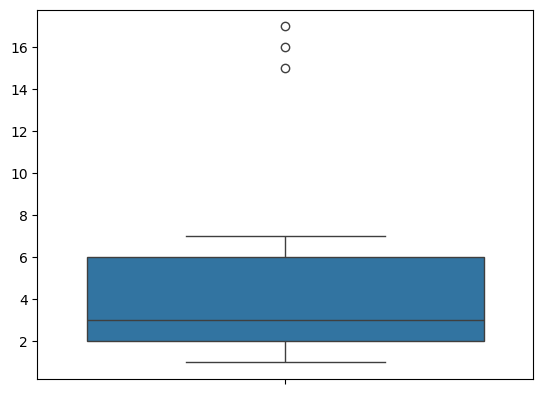

In [13]:
import seaborn as sns

dataWithOutlier = np.array([1,2,3,6,1,5,17,2,2,6,3,1,7,15,16,5,3,3,1]) # impostors
sns.boxplot(dataWithOutlier)

Very simple method, we just define some threshold.

<Axes: >

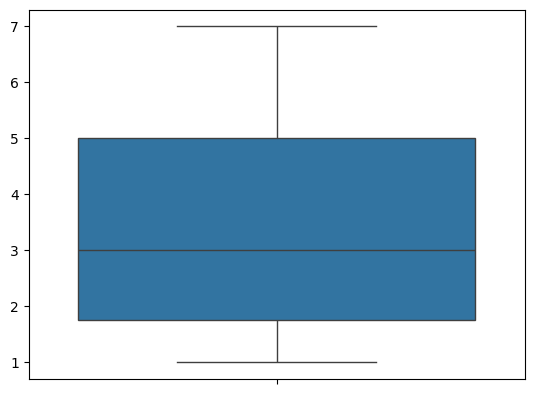

In [14]:
threshold = 10
removedOutliers = dataWithOutlier[dataWithOutlier <= threshold]
sns.boxplot(removedOutliers)

Use of Z-Score. But what is Z-Score? It tells how many standard deviations away data point is from the mean.

**Assumption**: The features are normally or approximately normally distributed.

In [15]:
from scipy.stats import zscore

# Generate arrat of Z-Scores
zScore = zscore(dataWithOutlier)
threshold = 2

# Make mask and apply to array of data
outlierMask = np.abs(zScore) > threshold
removedOutliers = dataWithOutlier[~outlierMask]  # Quite interesting syntax btw

print(f"Data with outliers: {dataWithOutlier}")
print(f"Data without outliers: {removedOutliers}")

Data with outliers: [ 1  2  3  6  1  5 17  2  2  6  3  1  7 15 16  5  3  3  1]
Data without outliers: [ 1  2  3  6  1  5  2  2  6  3  1  7 15  5  3  3  1]


Use of IQR. It is used when data is skewed.

In [16]:
dataWithOutlier = np.array(
    [1, 2, 3, 6, 1, 5, 17, 2, 2, 6, 3, 1, 7, 15, 16, 5, 3, 3, 1])
q1 = np.percentile(dataWithOutlier, 25)
q3 = np.percentile(dataWithOutlier, 75)
iqr = q3 - q1
lowerBound = q1 - threshold * iqr
upperBound = q3 + threshold * iqr
removedOutliers = dataWithOutlier[(dataWithOutlier >= lowerBound) & (dataWithOutlier <= upperBound)]

print(f"Data with outliers: {dataWithOutlier}")
print(f"Data without outliers: {removedOutliers}")

Data with outliers: [ 1  2  3  6  1  5 17  2  2  6  3  1  7 15 16  5  3  3  1]
Data without outliers: [1 2 3 6 1 5 2 2 6 3 1 7 5 3 3 1]


## Hypothesis Testing

Statistical significance is a concept used in data analysis and statistics to determine whether observed results are likely due to chance or reflect a real relationship between variables. Simply put, statistical significance helps us assess how confident we can be that an effect observed in a sample also exists in the broader population.

- Null hypothesis (H₀) – assumes that there is no difference or relationship between the variables being studied (the effect is due to chance).
- Alternative hypothesis (H₁) – assumes that there is a real difference or relationship between the variables.
- Significance level (α) – this is the threshold set by the researcher before analysis, usually at 0.05 (5%). It means that if the probability of the result happening by chance is less than 5%, we reject the null hypothesis and consider the result statistically significant.
- p-value – this is a measure that tells us how likely it is that the observed result could have occurred by chance. If the p-value is less than the chosen significance level (e.g., 0.05), we consider the result statistically significant.

Standard verification procedure:
- Formulate the null hypothesis $H_0$ and the alternative hypothesis $H_1$
- Select the appropriate test statistic
- Set the significance level $\alpha$
- Determine the critical region (reas where the observed test statistic is unlikely under $H_0$)
- Calculate the test statistic
- Make a decision on the hypothesis


**Significance will be important in next chapter**

## Statistical tests

### Normality test
Normality tests are statistical procedures used to assess whether a data set is well-modeled by a normal distribution and to evaluate how likely it is that the underlying random variable follows a normal distribution. These tests are important because many statistical methods, assume that the data are normally distributed.

- **Shapiro-Wilk Test**: tests whether a sample distribution is consistent with a normal distribution

In [17]:
from scipy.stats import shapiro

np.random.seed(42)  # For reproducibility
data = np.concatenate([np.random.normal(0, 1, 8), np.random.normal(-2, 0.5, 2)])

stat, p = shapiro(data)

print(f"Shapiro-Wilk Statistic = {stat:.3f}")
print(f"p-value = {p:.3f}")

if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

Shapiro-Wilk Statistic = 0.918
p-value = 0.344
Probably Gaussian


### T test
- **one-sample t-test**: used when we want to compare a sample mean with a population mean. A one-sample t-test examines whether the mean of a sample is statistically different from a known or hypothesized population mean

In [18]:
from scipy.stats import ttest_1samp

prices = np.array([122, 245, 145, 345, 200, 100, 200, 125])

populationMean = 200

stat, p = stats.ttest_1samp(prices, populationMean)

print(f"T Statistic = {stat:.3f}")
print(f"p-value = {p:.3f}")

if p > 0.05:
    print("Fail to reject the null hypothesis; there is no significant difference between the sample mean and the hypothesized population mean.")
else:
    print("Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.")
    

T Statistic = -0.514
p-value = 0.623
Fail to reject the null hypothesis; there is no significant difference between the sample mean and the hypothesized population mean.


### Chi-square  ($\chi^2$)

- **Chi-square independence test**: tests whether there is a relationship between two categorical variables

In [19]:
from scipy.stats import chi2_contingency

table = [[10, 20, 30], [6, 9, 17]]

stat, p, dof, expected = chi2_contingency(table)

print(f"Chi-Square Statistic = {stat:.3f}")
print(f"p-value = {p:.3f}")
print(f"Degrees of Freedom = {dof}")

if p > 0.05:
    print("The variables are likely independent (no significant relationship).")
else:
    print("The variables are likely dependent (significant relationship exists).")

Chi-Square Statistic = 0.272
p-value = 0.873
Degrees of Freedom = 2
The variables are likely independent (no significant relationship).


### ANOVA (Variance analysis)

- **One way ANOVA**: compares the means of more than two groups

In [20]:
from scipy.stats import f_oneway

set1 = [9, 9, 8, 7, 9]
set2 = [3, 2, 4, 9, 8]
set3 = [9, 8, 8, 3, 9]

stat, p = f_oneway(set1, set2, set3)

print(f"ANOVA Statistic = {stat:.3f}")
print(f"p-value = {p:.3f}")

ANOVA Statistic = 2.393
p-value = 0.133
